In [1]:
import tensorflow as tf
import numpy as np

# Getting down the basics

Machine Learning is essentially about mathematical transformation. So we need a lot of mathematical reasoning and modeling. And it would be hard to do it by hand, from scratch! Imagine writing a program to take the derivative of a high dimensional function, it would be a disaster! Luckily, TensorFlow got you covered! But before jumping right into the hard stuff and confused, let's first understand what is tensors and go up from there.

## Tensors - the building block for modern Machine Learning

As the name of TensorfFow suggested, if we want to start doing something, we need to have some of the mighty tensors. Tensors need to be initialized with some initial value. For example, you can create an *all-zeros* or *all-ones* tensors, or tensors with *random values*.

### All-zeros or all-ones tensors

In [2]:
#Tensor of ones 
x = tf.ones(shape=(2, 1))
#In numpy it's equivalent to
x_np = np.ones(shape=(2, 1))

#Tensor of zeros
y = tf.zeros(shape=(2, 1))
#Its equivalence
y_np = np.zeros(shape=(2, 1))

print(x)
print(y)
print(x.numpy() == x_np)
print(y.numpy() == y_np)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
[[ True]
 [ True]]
[[ True]
 [ True]]


2022-04-05 11:31:30.856689: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-05 11:31:30.856834: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Random tensors

In [3]:
#Tensor of random values from a normal distribution with mean 0 and standard deviation 1
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
#Its equivalence
x_np = np.random.normal(size=(3, 1), loc=0., scale=1.)

#Tensor of random values from a uniform distribution between 0 and 1
y = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
#Its equivalence
y_np = np.random.uniform(size=(3, 1), low=0., high=1.)
print(x.numpy())
print(y.numpy())
print(x_np)
print(y_np)

[[-0.10316827]
 [-0.4148079 ]
 [ 0.21878554]]
[[0.5848477 ]
 [0.8206525 ]
 [0.74757993]]
[[-0.78196382]
 [-0.66993898]
 [-0.5195006 ]]
[[0.2100299 ]
 [0.21849764]
 [0.01518838]]


### Tensors are Constant

Although tensors in TensorFlow and NumPy arrays are quite similar, one big difference is that TensorFlow tensors are constants. In NumPy, this code is bug-free

In [4]:
x_assign = np.zeros(shape=(2, 2))
x_assign[0, 0] = 1
print(x_assign)

[[1. 0.]
 [0. 0.]]


But doing the same thing in TensorFlow tensors will result in `TypeError: 'EagerTensor' object does not support item assignment`.

In [5]:
x_assign = tf.zeros(shape=(2, 2))
# x_assign[0, 0] = 1 This will result in an error
print(x_assign)

tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)


Here you might be wondering: "But to train a model, we will need to update its weights. If it's **not assignable**, what can I do?"

Glad you asked! Allow me to introduce: *variables*!

## Variables - Changing the mighty Tensors

`tf.Variable` is a class meant to manage modifiable state in TensorFlow. That's why in the previous chapter, we have to turn the `tf.Tensor` object into a `tf.Variable` object before passing it to `GradientTape`.

But let's just put away the hard part and warm up with some easy code. To create a `tf.Variable` object, you need to provide some initial value such as tensors.

In [6]:
v = tf.Variable(initial_value=tf.random.uniform(shape=(3, 1), minval=0.0, maxval=1.0))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.5848477 ],
       [0.8206525 ],
       [0.74757993]], dtype=float32)>


To modify its state, the variable can use its `assign` method, as follows

In [7]:
v.assign(tf.ones(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


And to modify a subset of the coefficients, the `assign` method still works

In [8]:
#There is a bug with tensorflow-metal (for Mac M1) where the operation was not provided
#so we will use the CPU instead of GPU here
# with tf.device('/device:cpu:0'):
#     v[0, 0].assign(3.)
#     print(v)

Similarly, `assign_add` and `assign_sub` is the coefficients equivalence for `+=` and `-=`

In [9]:
v.assign_add([[3.], [2.], [1.]])
print(v) #[[6.], [3.], [2.]]

v.assign_sub(tf.ones(shape=v.shape)) #[[8.], [4.], [2.]]

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [3.],
       [2.]], dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [2.],
       [1.]], dtype=float32)>

Now we know how we can change the unchangable, let's head on to the Tensor Operations land, where we can do all sort of math on tensors with TensorFlow.

## Tensor Operations

TensorFlow offers a wide variety of tensor operations to express mathematical formulas, such as `tf.square` to take the square, `tf.sqrt` to the the square root and many more.

In [10]:
a = tf.ones((2, 2))
b = tf.random.uniform(shape=(2, 2), minval=0, maxval=10)
print('b =', b.numpy())
c = tf.random.uniform(shape=(1, 2), minval=0, maxval=10)
print('c =', c.numpy())

#Take the square of a tensor
b = tf.square(b)
print('b =', b.numpy())
#Take the square root of a tensor
c = tf.sqrt(c)
print('c =', c.numpy())
#Adding two tensors element-wise
d = b + c
print('d =', d.numpy())
#Perform matrix multiplication on the tensors
e = tf.matmul(a, b)
print('e =', e.numpy())
#Multiply two tensors element-wise
e *= d
print('e =', e.numpy())

b = [[1.1144924 2.3359764]
 [7.9519653 1.3739705]]
c = [[0.18667221 0.74261427]]
b = [[ 1.2420933  5.4567857]
 [63.233753   1.887795 ]]
c = [[0.4320558  0.86175066]]
d = [[ 1.6741492  6.3185363]
 [63.66581    2.7495456]]
e = [[64.475845   7.3445807]
 [64.475845   7.3445807]]
e = [[ 107.942184   46.406998]
 [4104.9067     20.19426 ]]


And that's all about the basics that you need to understand for now. Let's turn it up a notch and find out about the way of the gradient via `GradientTape`!

# Going down with `GradientTape`

I have mentioned `GradientTape` many times before but what is it really? Well, to begin with, the reasons that separate TensorFlow with other frameworks is that, since the gradient of a function is the way to lower our way down the ground, which was a very hard problem to do until TensorFlow came along and provide a way to minimize the hardship of retrieving the gradient of any given function with respect to any of its inputs with only a few lines of code, which was `GradientTape` API! 

OK, enough backstory, let's get our hand dirty by start opening our `GradientTape` scope.

In [11]:
input_var = tf.Variable(initial_value=[[1., 3., 2.], [2., 5., 7.]])

with tf.GradientTape() as tape:
    result = tf.square(input_var)

gradients = tape.gradient(result, input_var)
print(gradients)

tf.Tensor(
[[ 2.  6.  4.]
 [ 4. 10. 14.]], shape=(2, 3), dtype=float32)


This is commonly used to calculate the gradients of the loss of a model with respect to its weights:

```
gradients = tape.gradient(loss, weights)
```

`GradientTape` can also be used with any arbitrary tensor, but only *trainable variables* are tracked automatically by default. The reason for that is because it would be too expensive computationally to store all the information needed to compute the gradient of anything with respect to anything. Trainable variables are tracked automatically because computing the gradients of a loss with regard to a list of trainable variables is the most common use for this API. 

With other types of tensor, you'd have to manually target it as being tracked by calling `tape.watch()` on it.

In [12]:
input_const = tf.constant([[1., 3., 2.], [2., 5., 7.]])

with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradients = tape.gradient(result, input_const)
print(gradients)

tf.Tensor(
[[ 2.  6.  4.]
 [ 4. 10. 14.]], shape=(2, 3), dtype=float32)


All we have seen so far is only considering *first-order gradients*, but it can also take the *second-order gradients*. For example, the gradient of the position of an object with respect to time is the speed of the object (*first-order gradient*) and the *second-order gradient* is its acceleration. To compute the *$n^{th}$-order gradients* just simply nest $n$ times gradient tapes. 

Here is an example of calculating the accelaration in free falling motion.

In [13]:
time = tf.Variable(tf.sort(tf.random.uniform(shape=(1, 10), minval=0, maxval=20)))

with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(speed)
print(acceleration)

tf.Tensor(
[[  3.8365128   5.165258    9.377526   11.980507  120.06783   136.52908
  139.7203    150.36807   153.27025   160.30054  ]], shape=(1, 10), dtype=float32)
tf.Tensor([[9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8]], shape=(1, 10), dtype=float32)


And now you can understand enough to start building any machine learning model based on gradient descent. Congratulations!

Now, let's celebrate that by building your first linear classifier from scratch with TensorFlow.

# Linear Classifier in pure TensorFlow

Let's start our journey with a simple linear classifier. The dataset I am using is a synthetic dataset: two classes of points in a 2D plane. 

We’ll generate each class of points by drawing their coordinates from a random distribution with a specific covariance matrix and a specific mean. Intuitively, the covariance matrix describes the shape of the point cloud, and the mean describes its position in the plane.

In [14]:
num_of_samples = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_of_samples
)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_of_samples
)

print(negative_samples.shape, positive_samples.shape)

(1000, 2) (1000, 2)


As you can see, both of the data points has shape (1000, 2). Let's concat these arrays into 1 with shape (2000, 2).

In [15]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

Let's also generate the label for these data points.

In [16]:
targets = np.vstack((np.zeros((num_of_samples, 1), dtype="float32"),
                     np.ones((num_of_samples, 1), dtype="float32")))

Let's plot it down so we could visualize it better with the help of Matplotlib.

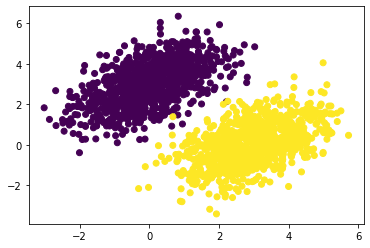

In [17]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [18]:
input_dim = inputs.shape[1]
output_dim = targets.shape[1]

W = tf.Variable(initial_value=tf.random.normal((input_dim, output_dim), mean=0., stddev=1.))
b = tf.Variable(initial_value=tf.zeros((output_dim,)))
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.74895126],
       [2.169584  ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


Here is our forward pass function:

In [19]:
def model(inputs):
    return tf.matmul(inputs, W) + b

And of course, our loss function. We are using MSE as our loss function.

In [20]:
def lossFunction(targets, predictions):
    per_sample_loss = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_loss)

We have our forward pass and our loss function, let's start building our training step.

In [21]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = lossFunction(targets, predictions)
    gradients_W, gradients_b = tape.gradient(loss, [W, b])
    W.assign_sub(gradients_W * learning_rate)
    b.assign_sub(gradients_b * learning_rate)
    return loss

Now we've got everything we need in order to train our model to classify. Instead of *mini-batch training*, we will use *batch training*. That means for every training step, we will iterate through the entire train set instead of small batches. 

On one hand, this will take much longer to run since we are computing the forward pass and the gradients for 2000 samples at once. On the other hand, each gradient update will be much more effective at reducing the loss of training data, since it will encompass information from all training samples instead of, say, 128 training samples. As a result, we will need many fewer steps of training and we should use a larger learning rate than we would typically use for mini-batch training.

In [22]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"loss at step {step}: {loss:.4f}")

loss at step 0: 29.1914
loss at step 1: 3.1691
loss at step 2: 0.6464
loss at step 3: 0.3074
loss at step 4: 0.2460
loss at step 5: 0.2213
loss at step 6: 0.2029
loss at step 7: 0.1866
loss at step 8: 0.1719
loss at step 9: 0.1585
loss at step 10: 0.1464
loss at step 11: 0.1353
loss at step 12: 0.1253
loss at step 13: 0.1162
loss at step 14: 0.1079
loss at step 15: 0.1003
loss at step 16: 0.0935
loss at step 17: 0.0872
loss at step 18: 0.0816
loss at step 19: 0.0764
loss at step 20: 0.0717
loss at step 21: 0.0675
loss at step 22: 0.0636
loss at step 23: 0.0601
loss at step 24: 0.0569
loss at step 25: 0.0540
loss at step 26: 0.0514
loss at step 27: 0.0490
loss at step 28: 0.0468
loss at step 29: 0.0448
loss at step 30: 0.0430
loss at step 31: 0.0414
loss at step 32: 0.0399
loss at step 33: 0.0385
loss at step 34: 0.0373
loss at step 35: 0.0362
loss at step 36: 0.0352
loss at step 37: 0.0342
loss at step 38: 0.0334
loss at step 39: 0.0326


After training it, let's see how our model classifies the training data points.

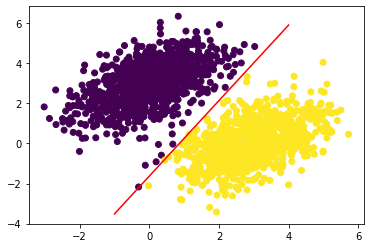

In [23]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
predictions = model(inputs)
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()